*  DSC 540-T302 Data Preparation
*  Week 9 & 10 Exercise
*  Peter Lozano

# Activity 7.01 Extracting the Top 100 e-books from Gutenberg

I have to extract the Top 100 e-books from [Project Gutenberg](https://www.gutenberg.org/browse/scores/top) using web scraping techniques. I will use Python along with the BeautifulSoup and requests libraries to accomplish this task.

## Import Libraries

In [262]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

## Read HTML from the URL

In [263]:
# Read HTML from the URL
gutenberg_url = "https://www.gutenberg.org/browse/scores/top"
# Get the page content
response = requests.get(gutenberg_url)

## Write a small function to check the status of the web request.

It's always good practice to check the status of the request to ensure that the page was retrieved successfully.

In [264]:
# Function for checking the status of the web request
def check_request_status(response):
    # 200 status code indicates that the request was successful.
    if response.status_code == 200:
        print("Request was successful.")
    else:
        print(f"Request failed with status code: {response.status_code}")

In [265]:
check_request_status(response)

Request was successful.


A **200** status code indicates that the request was successful. Any other status code indicates that there was an issue with the request.

## Decode the response and pass this on to **BeautifulSoup** for HTML parsing.

The response variable contains the HTML content of the page. However, just passing the response to BeautifulSoup may not work as expected because the content is in bytes format. Therefore, we need to decode the response content by accessing the contents attribute before passing it to BeautifulSoup for parsing.

I will show you what the response variable looks like before decoding.

In [266]:
response

<Response [200]>

As you can see, the response variable appears to only contain the response status but not the actual HTML content. This is because the response variable is an object that contains various attributes, including the status code, headers, and content.

To access the actual HTML content, we need to use the `.content` attribute of the response object. This will give us the raw bytes of the HTML content, which we can then decode to a string format if needed.

In [267]:
# Decode the response and pass this on to BeautifulSoup for HTML parsing.
soup = BeautifulSoup(response.content, 'html.parser')

Using the **BeautifulSoup** library, I will parse the HTML content to extract the relevant information about the top 100 e-books, such as titles and authors. I do this by passing the `html.parser` argument to the BeautifulSoup constructor.

## Find all the **href** tags and store them in a list of links. Check what the list looks like -- print the first 30 elements.

Now I have to find the tags that contain the information about the top 100 e-books. After inspecting the HTML structure of the page, I found that the top 100 e-books are listed under an `<ol>` tag with a preceding `<h2>` tag that contains the text "Top 100 EBooks yesterday".

In [268]:
# Initialize a list to store links
lst_links = []
# Find all the href tags and store them in the list
for link in soup.find_all('a', href=True):
    lst_links.append(link['href'])

# Print the first 30 elements of the list
print(lst_links[:30])

['/', '/donate/', '/about/', '/about/contact_information.html', '/about/background/', '/help/mobile.html', '/help/', '/ebooks/offline_catalogs.html', '/donate/', '/browse/scores/top', '/ebooks/categories', '/ebooks/bookshelf/', '/ebooks/', '/browse/scores/top', '/ebooks/categories', '/about/pretty-pictures.html', '#books-last1', '#books-last7', '#books-last30', '#authors-last1', '#authors-last7', '#authors-last30', '/ebooks/84', '/ebooks/2701', '/ebooks/1342', '/ebooks/1513', '/ebooks/145', '/ebooks/100', '/ebooks/2641', '/ebooks/37106']


## Use a regular expression to find the numeric digits in these links and loop over the appropriate range and use a regex to find the numeric digits in the link (href) string. Use the `findall()` method.

I know that all the books contain "ebooks/" followed by the numeric digits that represent the file numbers for the eBooks. I will use a regular expression to extract these numeric digits from the links.

In [269]:
# Initialize a list to store file numbers
file_numbers = []

# Loop over the list of links to extract numeric digits using regex
for link in lst_links:
    # Matching 'ebooks/' followed by digits using findall()
    match = re.findall(r'ebooks/(\d+)', link)
    if len(match) == 1:
        # Appending the numeric digits (file number) to the list
        file_numbers.append(match[0])
print(file_numbers[:30])  # Print the first 30 file numbers


['84', '2701', '1342', '1513', '145', '100', '2641', '37106', '43', '11', '67979', '2554', '16328', '16389', '1260', '768', '75617', '6761', '64317', '49402', '394', '2160', '1259', '4085', '5197', '6593', '74', '34562', '8492', '174']


## What does the **soup** object's text look like? Use the `.text()` method and print only the first 2,000 characters (do not print the whole thing, as it is too long).

I can use the **soup** object's `.text` attribute to get the text content of the HTML document. This will give me a plain text representation of the HTML.

In [270]:
soup.text[:2000]  # Print the first 2000 characters of the soup object's text

"\n\n\n\nTop 100 | Project Gutenberg\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nX\n\nGo!\n\n\n\n\n\n\n\n Donate \n\n\n\n\n\nAbout▼\n\nAbout Project Gutenberg \nContact Us\nHistory & Philosophy\nKindle & eReaders\nHelp Pages\nOffline Catalogs\nDonate\n\n\n\nFrequently Downloaded\nMain Categories\nReading Lists\nSearch Options\n\n\n\nFrequently Downloaded\nMain Categories\n\n\n\nFrequently Viewed or Downloaded\nCalculated from the number of times each eBook gets\ndownloaded. (Multiple downloads from the same Internet\naddress on the same day count as one download. Addresses\nthat download more than 100 eBooks in a day are considered\nrobots and are not counted.)\n\nDownloaded Books\n2026-01-231248297\nlast 7 days9017445\nlast 30 days36552811\n\nVisualizations and graphs are available as\npretty pictures.\n\n\nTop 100 EBooks: Yesterday - 7\xa0days - 30\xa0days\nTop 100 Authors: Yesterday - 7\xa0days - 30\xa0days\n\nTop 100 EBooks yesterday\n\nFrankenstein; Or, Th

## Search the extracted text (using regex) from the **soup** object to find the names of the top 100 eBooks (yesterday's ranking).

I will start by creating a temporary list to hold the strings of the top 100 eBook names.

In [271]:
list_titles_temp = []

## Create a starting index. It should point at the text Top 100 Ebooks yesterday. Use the **splitlines** method of **soup.text**. It splits the lines of the text of the **soup** object.

Parsing through the HTML content, I found that the text "Top 100 EBooks yesterday" is located at line index 98. Therefore, I will set the starting index to 98.

In [272]:
start_index = soup.text.splitlines().index('Top 100 EBooks yesterday') # Returns 98 as the start index


## Run the **for** loop from **1-100** to add the strings of the next **100** lines to this temporary list. **Hint**: use the **splitlines** method.

I will pass the `start_index` through the for loop to extract the next 100 lines, which contain the eBook titles. This will result in a list of strings, each representing an eBook title along with its author.

In [273]:
for i in range(100):
    # Append the line at the calculated index to the temporary list
    list_titles_temp.append(soup.text.splitlines()[start_index + 2 + i]) # +2 to skip the header lines

## Use regex to extract only text from the name strings and append them to an empty list. Use **match** and **span** to find the indices and use them.

Now that I have my temporary list of eBook titles with authors, I will use regular expressions to extract only the text portion of each title. This involves matching the alphabetic characters at the beginning of each string.

This method is effective but has flaws. For example, if an eBook title contains special characters or numbers, those special characters from the book will be excluded from the final list.

In [274]:
list_titles = []
for i in range(100):
    # Use regex to extract only the alphabetic characters from the beginning of each title
    id1, id2 = re.match('^[a-zA-Z ]*',list_titles_temp[i]).span() # Span is to get the start and end index of the match
    list_titles.append(list_titles_temp[i][id1:id2])

## Print the list of titles.

In [275]:
for title in list_titles:
    print(title)

Frankenstein
Moby Dick
Pride and Prejudice by Jane Austen 
Romeo and Juliet by William Shakespeare 
Middlemarch by George Eliot 
The Complete Works of William Shakespeare by William Shakespeare 
A Room with a View by E
Little Women
The Strange Case of Dr
Alice
The Blue Castle
Crime and Punishment by Fyodor Dostoyevsky 
Beowulf
The Enchanted April by Elizabeth Von Arnim 
Jane Eyre
Wuthering Heights by Emily Bront
The British battle fleet
The Adventures of Ferdinand Count Fathom 
The Great Gatsby by F
The Black Hawk War Including a Review of Black Hawk
Cranford by Elizabeth Cleghorn Gaskell 
The Expedition of Humphry Clinker by T
Twenty years after by Alexandre Dumas and Auguste Maquet 
The Adventures of Roderick Random by T
My Life 
History of Tom Jones
The Adventures of Tom Sawyer
John Deere
The King in Yellow by Robert W
The Picture of Dorian Gray by Oscar Wilde 
The wandering Jew by Moncure Daniel Conway 
The Brothers Karamazov by Fyodor Dostoyevsky 
A Modest Proposal by Jonathan Swi

# Activity 7.02 Building Your Own Movie Database by Reading an API

I will be building a complete movie database by communicating and interfacing with a free API from the OMDb portal ( http://www.omdbapi.com/ ). I will obtain a unique user key from the OMBDb website that must be used when I'm accessing the API. I will store this key in a **.json** file.

## Import **urllib.request, urllib.parse, urllib.error, and json**

In [276]:
import urllib.request, urllib.parse, urllib.error, json, os

## Obtain a key, store it, and open the JSON file as **APIkeys.json**

In [277]:
# Using open() to read the JSON file and load the API key within the same folder
with open('APIkeys.json') as f:
    # Load the JSON data from the file
    api_keys = json.load(f)

Just for validation purposes, I will print the key as well to ensure that it has been loaded correctly from the JSON file.

In [278]:
# Extract the OMDb API key from the loaded JSON data
omdb_api_key = api_keys['OMDb_API_Key']

print(omdb_api_key)

509350a1


## Assign the OMDb portal as a string to a variable

Need to make sure to include the **?** at the end of the URL, as this is required when passing parameters to the API.

In [279]:
omdb_portal = "http://www.omdbapi.com/?"

## Create a variable called **apikey** with the last portion of the URL (&apikey=secretapikey), where secretapikey is your own API key.

This variable will be a part of the base URL above when making requests to the OMDb API.

In [280]:
# Appending the API key to the URL parameter
apikey = '&apikey=' + omdb_api_key

## Write a utility function called **print_json** to print the movie data from a JSON file.

To make the function below, you must know what keys (fields for the movie data) are available in the JSON response from the OMDb portal. You can find this information in the API documentation. However, I had a difficult time finding the documentation. So, I called the API with a sample movie title as it was provided in the documentation to see what fields were returned in the JSON response.

I ran the code below to see the fields returned in the JSON response for the movie "Inception" as an example.

In [281]:
# Test the API by searching for the movie "Inception"
url = omdb_portal + 't=Inception' + apikey

# Make the web request to the API
request = urllib.request.urlopen(url)

# Read the data from the response and load it as JSON
data = request.read()

# Parse the JSON data
json_data = json.loads(data)

# Print all the keys in the JSON data
for key in json_data.keys():
    print(key)

Title
Year
Rated
Released
Runtime
Genre
Director
Writer
Actors
Plot
Language
Country
Awards
Poster
Ratings
Metascore
imdbRating
imdbVotes
imdbID
Type
DVD
BoxOffice
Production
Website
Response


These are the fields that are part of the final output for the assignment as well as addtional fields that I found useful.

In [282]:
def print_json(movie_data):
    list_keys = ['Title', 'Year','Rated', 'Released',
                 'Runtime','Genre', 'Director', 'Writer',
                 'Actors', 'Plot', 'Language', 'Country',
                 'Awards', 'Ratings','Metascore','imdbRating',
                 'imdbVotes','imdbID', 'BoxOffice'] # <-- Added BoxOffice key here
    # Print separator line for better readability
    print("-"*50)
    
    # Formatting the output to display on new lines
    for key in list_keys:
        if key in list(movie_data.keys()):
            print(f"{key}: {movie_data[key]}")
    print("-"*50)

## Write a utility function to download a poster of the movie based on the information from the JSON dataset and save it in your local folder. Use the os module. The poster data is stored in a JSON key called **Poser**. Use the open Python command to open a file and write the poster data. Close the file after you're done. This function will save the poster data as an image file.

In [283]:
def save_poster(movie_data):
    # Variables for title and poster URL
    title = movie_data['Title']
    poster_url = movie_data['Poster']
    
    # Return the file extension and poster data
    poster_file_extension = poster_url.split('.')[-1]
    poster_data = urllib.request.urlopen(poster_url).read()
    # Dynamically create a folder named 'Poster' in the current working directory to save the poster images
    savelocation = os.getcwd()+'\\'+'\\'+'Poster'+'\\'
    
    # Passes argument to create the directory if it does not exist
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename = savelocation + str(title) + '.' + poster_file_extension
    
    f = open(filename, 'wb')
    f.write(poster_data)
    f.close()

## Write a utility function called search_movie to search for a movie by its name, print the downloaded JSON data, and save the movie poster in the local folder.

Use a try-except loop for this. Use the previously created serviceurl and apikey variables. You have to pass on a dictionary with a key, t, and the movie name as the corresponding value to the urllib.parse.urlencode() function and then add the serviceurl and apikey variables to the output of the function to construct the full URL. This URL will be used to access the data. The JSON data has a key called Response. If it is True, that means the read was successful. Check this before processing the data. If it's not successful, then print the JSON key Error, which will contain the appropriate error message returned by the movie database.

In [284]:
def search_movie(title):
    # Using try and except block to handle exceptions
    try:
        # Construct the URL for the API request with a string conversion for the title
        url = omdb_portal + f't={str(title)}' + apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        data_request = urllib.request.urlopen(url)
        data = data_request.read()
        json_data=json.loads(data)
        # Check if the response is successful
        if json_data['Response']=='True':
            print_json(json_data)

            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ", json_data['Error'])
    except Exception as e:
        print("Unable to retrieve the data", e)

Alternatively, I could have checked the url response code prior to reading the data (**data = uh.read()**). A response code of 200 indicates success; any other code indicates failure. However, this won't help with the specific error message that is required by this assignment.

## Test the **search_movie** function by entering **Titanic**

In [285]:
search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=509350a1
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States
Awards: Won 11 Oscars. 126 wins & 84 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '88%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,371,194
imdbID: tt0120338
BoxOffice: $674,354,882
--------------------------------------------------


The data returned successfully and separated in a legible format!

Also poster successfully saved as Titanic.jpg

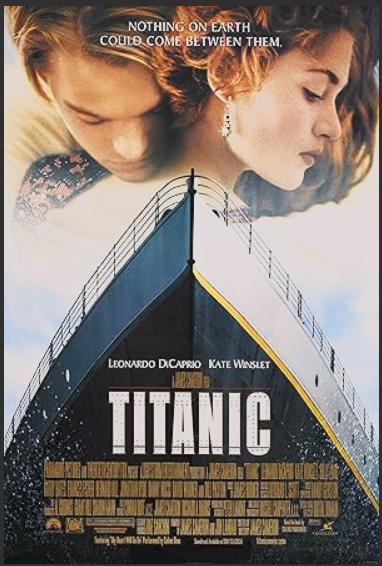

## Test the **search_movie** function by entering **Random_error** and retrieve the data for **Random_error**. The expected output should be Movie not found!

In [286]:
search_movie("Random_error")

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=509350a1


Error encountered:  Movie not found!


The function works as expected by throwing the error message "Movie not found!"

# Assignment 3: Connect to an API of your choice and do a simple data pull

> You can use any API - except the API you have selected for your project.

> a. In previous versions of this course we have always used Twitter, but with recent organizational changes at Twitter, it has become increasingly difficult to access the free APIs available at Twitter. You are more than welcome to try to use Twitter's API for this portion of the assignment, bust please note, there has been some inconsistency experienced when following along with their documentation posted.

> b. Connect to the API and do a "GET" call/operation on the API to return a subset of data from the API

I tried doing the Twitter (X as it is now called) API. However, it seems like the "free" access has been severely limited to only posting tweets. It seems they made it for bots only. Therefore, I decided to use a more "fun" API - the swapi - Star Wars API (https://swapi.dev/). This API provides data about the Star Wars universe, including information about films, characters, planets, species, starships, and vehicles. Yes, I'm a Star Wars fan!

In [287]:
# Define the base URL
url = "https://swapi.dev/api/"

In [288]:
response = requests.get(url)

Now I have to check the status of the request to ensure that the page was retrieved successfully.

In [289]:
# Check if it worked (Status 200)
if response.status_code == 200:
    print("Request was successful.")
    data = response.json() # Parse JSON
else:
    print(f"Request failed with status code: {response.status_code}")

Request was successful.


I will check what keys (fields) are available in the JSON response from the swapi portal.

In [290]:
for key in data.keys():
    print(key)

people
planets
films
species
vehicles
starships


Great options! In the documentation, they provide a search option as well. I will create a function so that I can pass on which table to refer to (people, planets, films, species, starships, vehicles) and the search parameter like name or title to retrieve specific data.

In [291]:
def search_swapi(category, search_param):
    # Bringing base URL inside the function for convenience
    base_url = "https://swapi.dev/api/"
    # Dynamically patching URL based on category and search parameter
    search_url = f"{base_url}{category}/?search={search_param}"
    
    response = requests.get(search_url)
    
    # Only proceed if the request was successful
    if response.status_code == 200:
        data = response.json()
        # Ensure there are results to display
        if data['count'] > 0:
            # Print the result in a new line for each key
            for result in data['results']:
                # For each key-value pair in the result dictionary
                for key, value in result.items():
                    print(f"{key}: {value}")
                print()  # Add a blank line between results
        else:
            print(f"No results found for {search_param} in {category}.")
    else:
        print(f"Request failed with status code: {response.status_code}")

In [292]:
search_swapi("people", "Luke Skywalker")

name: Luke Skywalker
height: 172
mass: 77
hair_color: blond
skin_color: fair
eye_color: blue
birth_year: 19BBY
gender: male
homeworld: https://swapi.dev/api/planets/1/
films: ['https://swapi.dev/api/films/1/', 'https://swapi.dev/api/films/2/', 'https://swapi.dev/api/films/3/', 'https://swapi.dev/api/films/6/']
species: []
vehicles: ['https://swapi.dev/api/vehicles/14/', 'https://swapi.dev/api/vehicles/30/']
starships: ['https://swapi.dev/api/starships/12/', 'https://swapi.dev/api/starships/22/']
created: 2014-12-09T13:50:51.644000Z
edited: 2014-12-20T21:17:56.891000Z
url: https://swapi.dev/api/people/1/



Interesting results! Seems like there are some opportunities to improve the function further by adding another API call to retrieve related data like homeworld, films, species, starships, and vehicles when the result contains URLs for these fields.

Will have to create a nested for loop to handle these additional API calls to retrieve related data. Notice how films and vehicles are lists of URLs, while homeworld and species are single URLs. Need to handle both scenarios.

In [293]:
# Revised search_swapi function to include related data retrieval
def search_swapi(category, search_param):
    base_url = "https://swapi.dev/api/"
    search_url = f"{base_url}{category}/?search={search_param}"
    
    response = requests.get(search_url)
    
    if response.status_code == 200:
        data = response.json()
        if data['count'] > 0:
            # Print the result in a new line for each key
            for result in data['results']:
                for key, value in result.items():
                    # Check if the value is a URL or list of URLs
                    # Single URL
                    if isinstance(value, str) and value.startswith('http'):
                        # Make a new request to get related data for single URL
                        related_response = requests.get(value)
                        
                        if related_response.status_code == 200:
                            related_data = related_response.json()
                            # Print in line with the main result with related name/title
                            print(f"{key}: {related_data.get('name', related_data.get('title', 'N/A'))}")
                        else:
                            print(f"{key}: Unable to retrieve related data.")
                    
                    # Else if the value is a list of URLs (i.e., films, vehicles)
                    # List of URLs
                    elif isinstance(value, list) and all(isinstance(item, str) and item.startswith('http') for item in value):
                        related_names = []
                        for item in value:
                            related_response = requests.get(item)
                            # Make a new request to get related data for each URL in the list
                            if related_response.status_code == 200:
                                related_data = related_response.json()
                                related_names.append(related_data.get('name', related_data.get('title', 'N/A')))
                            else:
                                related_names.append('N/A')
                        
                        print(f"{key}: {', '.join(related_names)}")
                    else:
                        print(f"{key}: {value}")
                print()  # Add a blank line between results
        else:
            print(f"No results found for {search_param} in {category}.")
    else:
        print(f"Request failed with status code: {response.status_code}")

In [294]:
search_swapi("people", "Luke Skywalker")

name: Luke Skywalker
height: 172
mass: 77
hair_color: blond
skin_color: fair
eye_color: blue
birth_year: 19BBY
gender: male
homeworld: Tatooine
films: A New Hope, The Empire Strikes Back, Return of the Jedi, Revenge of the Sith
species: 
vehicles: Snowspeeder, Imperial Speeder Bike
starships: X-wing, Imperial shuttle
created: 2014-12-09T13:50:51.644000Z
edited: 2014-12-20T21:17:56.891000Z
url: Luke Skywalker



Everything looks good except for the **species** field. I thought there was a mistake, but it seems that Luke Skywalker does not have a species assigned in the swapi database.

In [295]:
# Using search_swapi function to retrieve Imperial Star Destroyer details
search_swapi("starships", "Imperial Star Destroyer")

name: Star Destroyer
model: Imperial I-class Star Destroyer
manufacturer: Kuat Drive Yards
cost_in_credits: 150000000
length: 1,600
max_atmosphering_speed: 975
crew: 47,060
passengers: n/a
cargo_capacity: 36000000
consumables: 2 years
hyperdrive_rating: 2.0
MGLT: 60
starship_class: Star Destroyer
pilots: 
films: A New Hope, The Empire Strikes Back, Return of the Jedi
created: 2014-12-10T15:08:19.848000Z
edited: 2014-12-20T21:23:49.870000Z
url: Star Destroyer



I'm a Star Wars fan and even I don't know all the details about the Imperial Star Destroyer!

But hey, now I do! And I now know my function works well too!

# Assignment 4

> Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You can use **Matplotlib**, **Seaborn**, or another package if you prefer.
> * a. Line
> * b. Scatter
> * c. Bar
> * d. Histogram
> * e. Density Plot
> * f. Pie Chart

I created a dataset based on the Week 7 & 8 candy dataset called **candy_popularity.xlsx** that contains the candy names and their popularity scores based on the number of times each candy was selected as a favorite in the original dataset.

Using this dataset, I will create the following visualizations using plotly:
1. Bar Chart
2. Pie Chart
3. Histogram

## Bar Chart

In my dataset, I have 3 columns that contain the ratings: "JOY", "MEH", and "DESPAIR". I want to transpose these 3 columns into a single "Total Ratings" column for better visualization.

I need to also group by year and rating so that I can see the totals for each rating per year.

In [296]:
# Load the candy popularity dataset
popularity = pd.read_excel('candy_popularity.xlsx')

popularity['year'] = popularity['year'].astype(str)

# Transpose the ratings columns into a single "Total Ratings" column
popularity_melted = popularity.melt(id_vars=['year','candy'], value_vars=['JOY', 'MEH', 'DESPAIR'],
                                    var_name='Rating', value_name='Total Ratings')

# Group by year and Rating to get the total ratings per year
popularity_grouped = popularity_melted.groupby(['year', 'Rating']).sum().reset_index()

# popularity_grouped['year'] = popularity_grouped['year'].astype(str)

popularity_grouped

,year,Rating,candy,Total Ratings
0,2015-01-01,DESPAIR,100 Grand BarAnonymous Brown Globs That Come I...,276420
1,2015-01-01,JOY,100 Grand BarAnonymous Brown Globs That Come I...,202087
2,2015-01-01,MEH,100 Grand BarAnonymous Brown Globs That Come I...,0
3,2016-01-01,DESPAIR,100 Grand BarAnonymous Brown Globs That Come I...,39001
4,2016-01-01,JOY,100 Grand BarAnonymous Brown Globs That Come I...,41889
5,2016-01-01,MEH,100 Grand BarAnonymous Brown Globs That Come I...,37400
6,2017-01-01,DESPAIR,100 Grand BarAbstained From M&m'ing.Anonymous ...,58254
7,2017-01-01,JOY,100 Grand BarAbstained From M&m'ing.Anonymous ...,64206
8,2017-01-01,MEH,100 Grand BarAbstained From M&m'ing.Anonymous ...,53095


In [ ]:
# Bar chart using plotly
import plotly.express as px
import pandas as pd
from plotly.subplots import make_subplots

# Create a bar chart
fig_bar = px.bar(popularity_melted, 
                 x='candy', 
                 y='Total Ratings', 
                 color='year', 
                 title='Candy Popularity Bar Chart',
                 # Side by side bars for each year
                 barmode='group'
)

# Show the bar chart
fig_bar.show()

Using plotly because of its interactivity and ease of use for creating visually appealing charts. This graph will help us compare the popularity of different candies across the years based on their ratings. It doubles up to show not only how the candies compare against each other, but also how the ratings for each candy have changed over the years.

I can also easily spot that there were a handful of candies that do not have ratings for certain years, indicating that they may not have been available or popular during those times or perhaps they were newly introduced or discontinued in those years. For example, "Brach Products" was only rated in 2015.
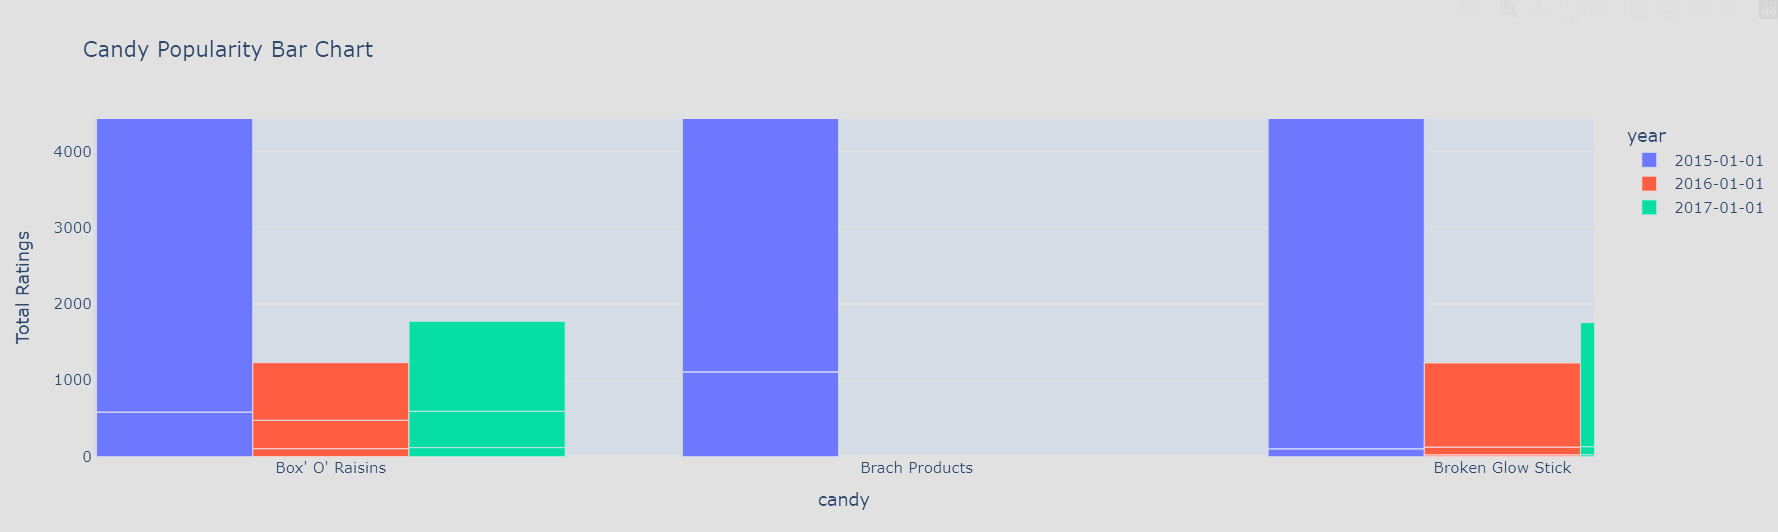

Also, I noticed that the candies on the far right side of the chart have no 2015 ratings at all, indicating that they were likely introduced after 2015.
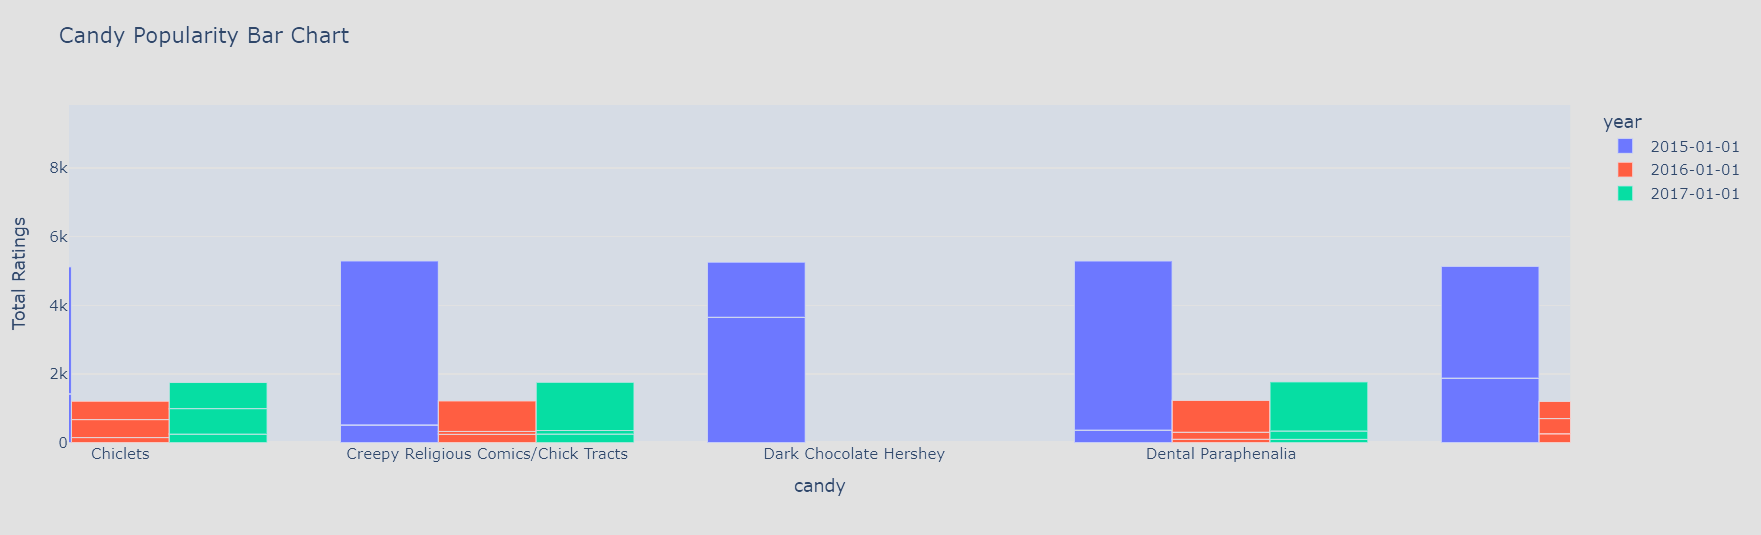

## Pie Chart

A pie chart can help us visualize total participation by rating category so we can see the overall distribution of ratings across all years.

Now I will create a pie chart to visualize the distribution of candy popularity based on the ratings.

In [298]:
# Pie chart using plotly

# Create a pie chart
fig_pie = px.pie(popularity_grouped, 
                 names='year', 
                 values='Total Ratings', 
                 title='Candy Popularity Pie Chart',
                 color='year',
                 hole=0.3 # To create a donut chart
)
# Show the pie chart
fig_pie.show()

So, 2015 was a big year for candy! It shows that I had the most participants that year as opposed to the other years. This leads me to believe that using a bar chart to visualize ratings per year is leading to a bias towards 2015 due to the high number of participants. A pie chart helps to even out this bias by showing the overall distribution of ratings across all years and level setting the significance of the counts per year. So, I will create another pie chart split by year to see how the ratings distribution looks for each year.

For simplicity sake, I will create subplots for each year to visualize the pie charts side by side.

In [ ]:
from plotly.subplots import make_subplots

# Create unique list of years for subplots
years = sorted(popularity_grouped['year'].unique())

# Initialize subplots
fig = make_subplots(
    # 1 row, n columns based on number of years (3 years)
    rows=1,
    cols=len(years),
    # Specs is required to define the `type` of subplot, here it's 'domain' for pie charts
    specs=[[{'type': 'domain'}] * len(years)],
    # Titles for each subplot
    subplot_titles=[f"{year}" for year in years]
)

# Rating Pie chart per year
for i, year in enumerate(years):
    # Filter data for the specific year
    data_year = popularity_grouped[popularity_grouped['year'] == year]
    pie = px.pie(
        data_year,
        names='Rating',
        values='Total Ratings',
        color='Rating',
        hole=0.3, # To create a donut chart
    )
    # Add the single pie trace into the subplot
    fig.add_trace(pie.data[0], row=1, col=i + 1)

fig.update_traces(textinfo='percent+label')  # optional labeling so rating type is visible

# Overall layout chart customization
fig.update_layout(
    title_text='Candy Popularity Pie Charts by Year',
    legend_title_text='Rating',
    showlegend=False, # Not necessary
    width=460 * len(years),
    height=420
)

fig.show()

This is easier to compare each year and to see some quick callouts. For instance, 2015 had no "MEH" ratings, indicating that candies were either loved or hated that year! Or perhaps there was an issue with the data collection that year for "MEH" ratings.

However, 2015 had the most "JOY" ratings compared to other years. However, since it is plausible that "MEH" ratings were not collected that year, comparing only 2016 and 2017 would be more appropriate. In that case, 2017 had slightly more "JOY" ratings than 2016.

## Line Plot

I will use a line plot since I have year information and I want to see trends over time. However, since I have already visualized the ratings per year using a bar chart, I believe a line chart will help me see trends over time in an easier to read format.

In [ ]:
# Ensure chronological x-order
from turtle import width


year_order = sorted(popularity_melted['year'].unique())

# Line plot
fig = px.line(
    # Using melted data for plotting candy
    popularity_melted.sort_values('year'),
    x='year',
    y='Total Ratings',
    color='candy',
    # To split graph by rating
    facet_col='Rating',
    # Only one graph per row
    facet_col_wrap=1,
    markers=False,
    # Ensuring chronological order
    category_orders={'year': year_order},
    title='Candy rating counts over years (split by rating)'
)
fig.update_layout(legend_title_text='Candy', height=900, width=1800)
fig.show()

I could have graphed the line chart in a single plot showing the rating (JOY, MEH, DESPAIR) trends over the years for the overall popularity of candies per year. However, I believe splitting the graph by candy to show the trend of each candy's ratings over the years is more insightful. The reason is because you can tell the dispersion of ratings for each candy over the years. For example, "Any Full Sized Candy" had the highest "JOY" ratings in 2015. But, it dropped significantly in 2016 and 2017. Of course, this goes back to the earlier observation that 2015 had the most participants. So, it's possible that the drop in ratings for "Any Full Sized Candy" is due to fewer participants in 2016 and 2017. Nonetheless, the line chart helps to visualize these trends more clearly.

Lastly, because I used plotly, I can select specific candies from the legend to highlight their trends over the years. This interactivity allows for a more focused analysis of individual candy performance over time.